# Homework 4
Deadline: 2nd February 23:59, delivered to your tutor.





# Exercise: Understanding Independence and Correlation

## Background Information

1. **Independence of Random Variables**  
   Two random variables $X$ and $Y$ are said to be independent if the occurrence of one does not affect the probability of the other. Mathematically, this means:  
   $$
   P(X \leq x, Y \leq y) = P(X \leq x)P(Y \leq y) \quad \text{for all } x, y.
   $$
   Equivalently, their joint probability density function (pdf) or mass function can be written as the product of their marginal pdfs or mass functions:  
   $$
   f_{X,Y}(x, y) = f_X(x)f_Y(y).
   $$

2. **Correlation**  
   The correlation between two random variables $X$ and $Y$ is a measure of their linear relationship, defined as:  
   $$
   \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}.
   $$
   Here, $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\text{Var}(X)$ and $\text{Var}(Y)$ are their variances. If $\rho(X, Y) = 0$, it means there is no linear relationship between $X$ and $Y$, but they may still be dependent.

---

## Task 1a (0.5p)

   Find a specific example of two random variables $X$ and $Y$ such that:
   - $X$ and $Y$ are dependent.
   - The correlation $\rho(X, Y)$ is equal to $0$.

Attach proof, either as markdown code, or photo.


## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

**Write your answers clearly!**

![1a](1a.jpg)

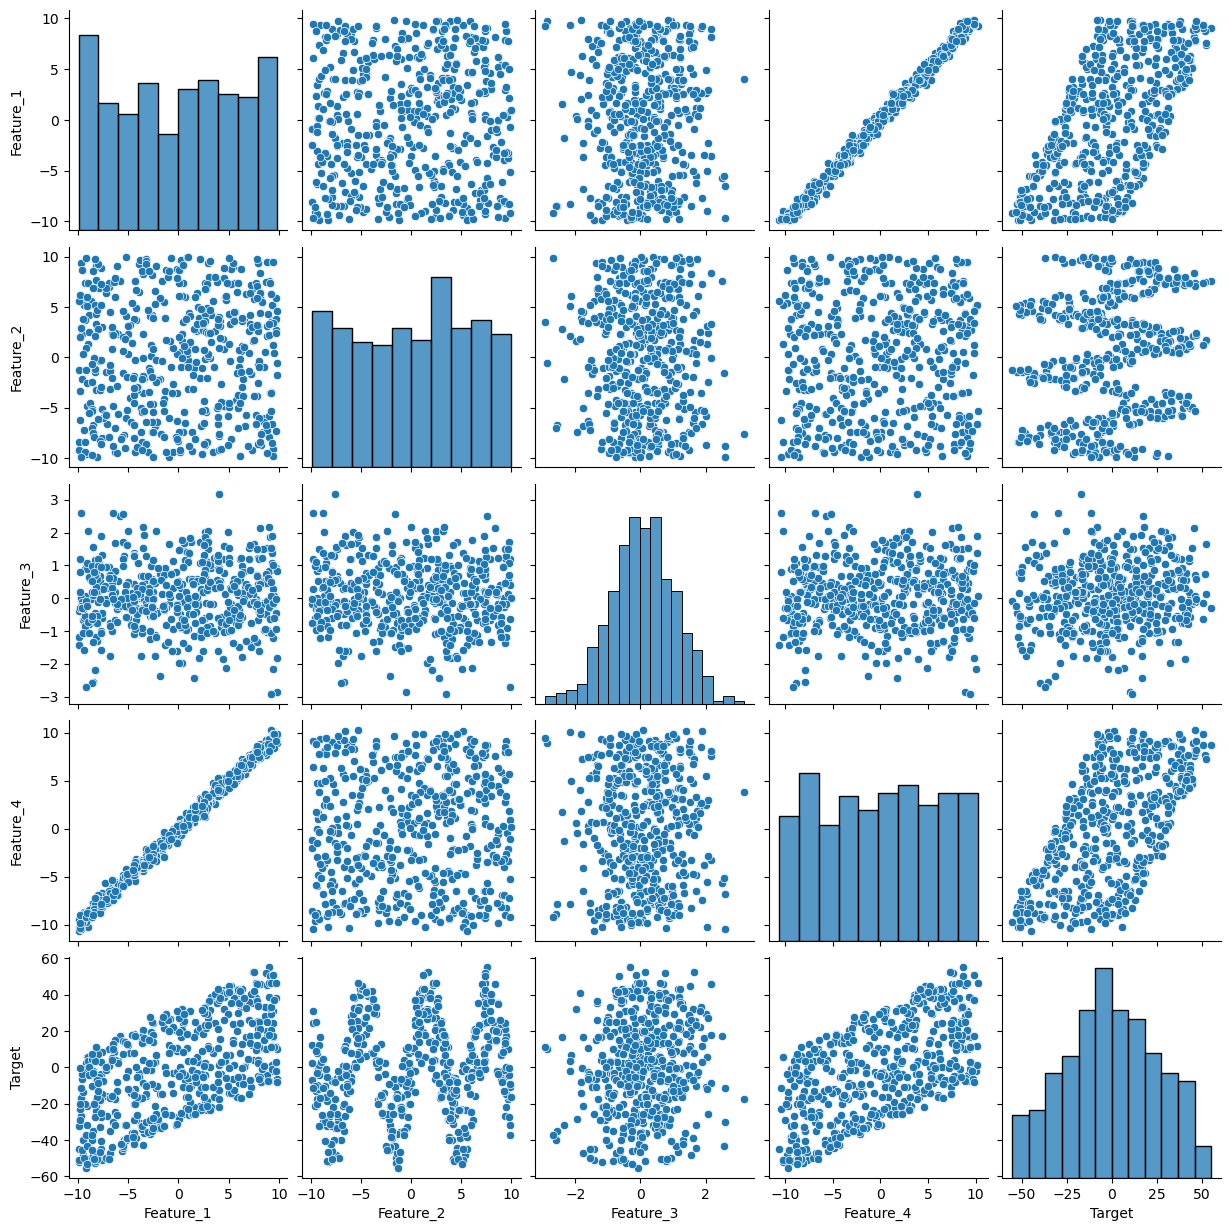

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
sns.pairplot(data)
plt.show()


Features 1 and 4 are almost identical if we take a look at the correlation with the target, feature 2 seems to be correlated with the target, what is interesting in feature 3 is that in looks like a distribution of noise.

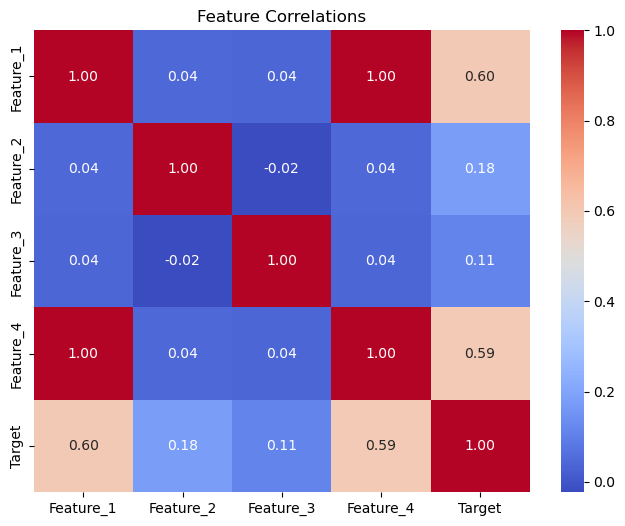

In [3]:
# prompt: correlations of random features with target

correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

Conclusions: 1 and 4 are highly correlated with the target and, what is more, perfectly correlated with each other, another proof that they are almost identical and there is no difference which one should we choose to predict target. Feature 2 is not highly correlated with the target, 3 is even worse, which means that it should be ignored because of the noise.

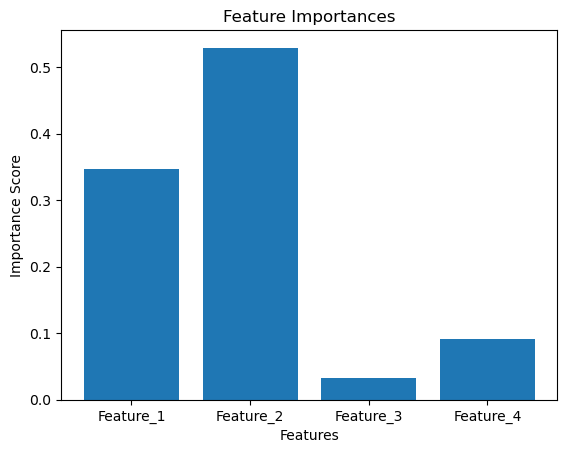

In [4]:
# prompt: do the same plot as above but ionstead of correlation use feature importance from random forest

from sklearn.ensemble import RandomForestRegressor


X = data.drop(columns=["Target"]) 
y = data["Target"]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
plt.bar(X.columns, importances)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.show()

Random forest shows us that feature 3 is redundant (ultimate proof of what we thought before), feature 2 meanwhile is the most important one. 

# Problem 2

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

![2](2.jpg)

# **Problem 3 (1p)**

In this problem you will use algorithm from Online Learning and Boosting, called Multiplicative Weights Update https://www.cs.princeton.edu/~arora/pubs/MWsurvey.pdf to solve the following optimization problem.

## Problem Definition
- **Input**:
  - Universe $U = \{1, 2, \dots, n\}$
  - Sets $\mathcal{S} = \{S_1, \dots, S_m\},\ S_i \subseteq U$
- **Goal**: Find smallest $\mathcal{C} \subseteq \mathcal{S}$ covering $U$

## Algorithm

**Initialize weights**:
   $$
   w_u^{(1)} = 1 \quad \forall u \in U
   $$

**Repeat until all elements covered**:
1. **Choose set** $S_i$ with probability:
   $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$

2. **Add** $S_i$ to solution $\mathcal{C}$

3. **Update weights** for uncovered $u \in S_i$:
   $$
   w_u^{(t+1)} = \frac{1}{2}w_u^{(t)}
   $$

## Task
1. Show that the total number of rounds (the number of sets the algorithm returns) is on expectation at most O(\log n) worse than the optimum number of sets needed:
   $$
   \mathbb{E}[T] \leq 2\text{OPT}\ln n
   $$

